In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")

#num_words = 100: Limits the vocabulary size to the 100 most frequent words.
#oov_token="<OOV>": Sets <OOV> as the token for out-of-vocabulary words (words not in the top 100).

tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

print(word_index)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Create example sentences

In [ ]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
]

print(sentences)

Basic tokenization

In [ ]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print("Word index",word_index)

Convert sentences to sequences

In [ ]:
#each word is replaced by its ID
sequences = tokenizer.texts_to_sequences(sentences)
print("Sequences",sequences)

Test with new sentences


In [ ]:
new_sentence = ["I love my phone"]
new_sequences = tokenizer.texts_to_sequences(new_sentence)
print("New sequences",new_sequences)
#phone is not included in the initial tokenizer

sen_after = tokenizer.sequences_to_texts(new_sequences)
print("Sentence after tokenization",sen_after)

Addition of OOV (out of vocabulary)

In [ ]:
#this token replaces unknown words to better manage new sentences

tokenizer_oov = Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer_oov.fit_on_texts(sentences)
word_index_oov = tokenizer_oov.word_index

seq_test_oov = tokenizer_oov.texts_to_sequences(new_sentence)
print("Word index",word_index_oov)

print("Sequence after OOV : ",seq_test_oov)

Padding application


In [ ]:
#Padding : add 0 to make the length of sequences uniform
# to align short sequences to longer ones in a batch of data

seq_padded = pad_sequences(seq_test_oov, padding='post' , maxlen = 10 , truncating = 'post')
print("Sequence after padding : ",seq_padded)

# **Loading Sarcasm data**

In [ ]:
#lets load hugging face library for datasets
!pip install datasets

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rmisra/news-headlines-dataset-for-sarcasm-detection")

print("Path to dataset files:", path)

100%|██████████| 3.30M/3.30M [00:01<00:00, 2.67MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/versions/2


In [ ]:
from datasets import load_dataset

dataset = load_dataset(path)

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
#Prepare the data
sentences = [item['headline'] for item in dataset['train']]
labels = [item['is_sarcastic'] for item in dataset['train']]

In [ ]:
print(sentences[0])
print(labels[0])

former versace store clerk sues over secret 'black code' for minority shoppers
0


In [ ]:
#Tokenize the sentences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded_sentences = pad_sequences(sequences ,maxlen=100, padding='post', truncating='post')

{'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'by': 19, 'after': 20, 'this': 21, 'up': 22, 'out': 23, 'be': 24, 'how': 25, 'as': 26, 'that': 27, 'it': 28, 'not': 29, 'are': 30, 'your': 31, 'his': 32, 'what': 33, 'he': 34, 'just': 35, 'all': 36, 'who': 37, 'has': 38, 'will': 39, 'more': 40, 'report': 41, 'into': 42, 'one': 43, 'year': 44, 'have': 45, 'over': 46, 'why': 47, 'area': 48, 'u': 49, 'day': 50, 'donald': 51, 'says': 52, 's': 53, 'can': 54, 'woman': 55, 'first': 56, 'time': 57, 'like': 58, 'her': 59, 'no': 60, 'get': 61, 'old': 62, 'off': 63, "trump's": 64, 'life': 65, 'people': 66, 'now': 67, 'an': 68, 'obama': 69, 'house': 70, "'": 71, 'still': 72, 'white': 73, 'make': 74, 'was': 75, 'back': 76, 'than': 77, 'women': 78, 'down': 79, 'if': 80, 'my': 81, 'i': 82, 'clinton': 83, '5': 84, 'when': 85, 'could': 86, 'world': 87, 'their': 88, 

In [ ]:
print("Exemples de séquences après tokenisation et padding")
print(padded_sentences[45])

Exemples de séquences après tokenisation et padding
[1012 6317 1774 4109 6318  705    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(
    padded_sentences, labels, test_size=0.2, random_state=42
)

print(training_sentences[895])

[5726    5    4  232 2084 2408  639  115   44    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(training_sentences, training_labels)

predictions = model.predict(testing_sentences)

accuracy = accuracy_score(testing_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5627146213627326


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
new = 'marriage breaks up over procreative differences'
new_sequence = tokenizer.texts_to_sequences([new])
new_padded_sequence = pad_sequences(new_sequence, maxlen=100, padding='post', truncating='post')

prediction = model.predict(new_padded_sequence)

if prediction[0] == 0:
    print("The sentence is not sarcastic")
else:
    print("The sentence is sarcastic")

The sentence is not sarcastic


# Sarcasm Classification Using Neural network



In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Sortie binaire pour sarcasme ou non
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#convertir les labels en tableau numpy pour compatibilité avec Keras
import numpy as np
labels_array = np.array(labels)

model.fit(padded_sentences, labels_array, epochs=10, validation_split=0.2)

model.summary()

Epoch 1/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5754 - loss: 0.6686 - val_accuracy: 0.7879 - val_loss: 0.4574
Epoch 2/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8205 - loss: 0.4146 - val_accuracy: 0.8379 - val_loss: 0.3657
Epoch 3/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8643 - loss: 0.3301 - val_accuracy: 0.8804 - val_loss: 0.2973
Epoch 4/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8749 - loss: 0.2958 - val_accuracy: 0.8637 - val_loss: 0.3039
Epoch 5/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8975 - loss: 0.2560 - val_accuracy: 0.9011 - val_loss: 0.2507
Epoch 6/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9076 - loss: 0.2326 - val_accuracy: 0.8796 - val_loss: 0.2833
Epoch 7/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9162 - loss: 0.2108 - val_accuracy: 0.9086 - val_loss: 0.2296
Epoch 8/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9257 - loss: 0.1928 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481,301 (1.84 MB)

 Trainable params: 160,433 (626.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,868 (1.22 MB)

Epoch 1/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9372 - loss: 0.1593 - val_accuracy: 0.9189 - val_loss: 0.1986
Epoch 2/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9412 - loss: 0.1521 - val_accuracy: 0.8688 - val_loss: 0.3093
Epoch 3/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9424 - loss: 0.1481 - val_accuracy: 0.9276 - val_loss: 0.1854
Epoch 4/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9423 - loss: 0.1473 - val_accuracy: 0.9194 - val_loss: 0.2096
Epoch 5/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9485 - loss: 0.1347 - val_accuracy: 0.9288 - val_loss: 0.1805
Epoch 6/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9441 - loss: 0.1434 - val_accuracy: 0.9241 - val_loss: 0.1873
Epoch 7/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9464 - loss: 0.1388 - val_accuracy: 0.9254 - val_loss: 0.1995
Epoch 8/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9496 - loss: 0.1301 - 

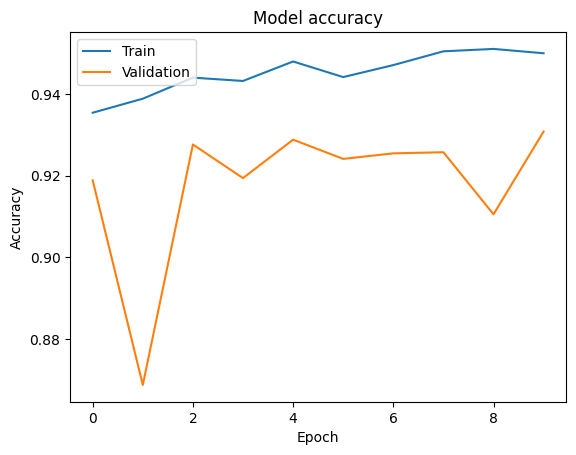

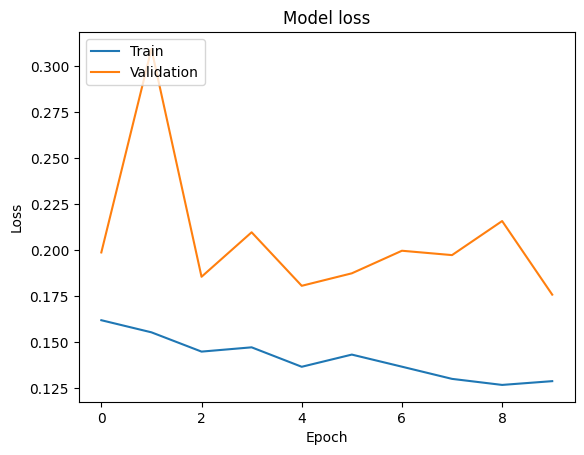

In [ ]:
# prompt: generate th eplot to evaludate th eloss and else

import matplotlib.pyplot as plt

# Assuming you have trained your model and have access to the history object
# Replace this with the actual history object obtained from model.fit
history = model.fit(padded_sentences, labels_array, epochs=10, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Synthetic test dataset with labels
test_sentences = [
    ("Oh great, another meeting. Just what I needed."),         # Sarcastic
    ("Fantastic! Another deadline right before the weekend."),  # Sarcastic
    ("Yes, because more emails in my inbox is exactly what I wanted."),  # Sarcastic
    ("Sure, I'd love to stay late on a Friday night."),         # Sarcastic
    ("Amazing, a traffic jam on my way to the interview."),     # Sarcastic
    ("Wow, yet another broken promise. This is getting fun."),  # Sarcastic
    ("I am actually looking forward to that project meeting."), # Literal
    ("Another Monday, another opportunity to learn!"),          # Literal
    ("Fantastic! We are moving forward with the new project."), # Literal
    ("Looking forward to a productive week ahead!")             # Literal
]

labels = [1,1,1,1,1,1,0,0,0,0]

In [ ]:
test_sentences_sequences = tokenizer.texts_to_sequences(test_sentences)

# Pad the test sentences
padded_test_sentences = pad_sequences(test_sentences_sequences, maxlen=100, padding='post')

# Convert labels to numpy array
labels_array = np.array(labels)

# Predict probabilities and convert them to binary labels
y_pred_custom_proba = model.predict(padded_test_sentences).flatten()  # Probabilities
y_pred_custom = (y_pred_custom_proba > 0.4).astype(int)  # Binary predictions

# Calculate metrics for the custom model
custom_precision = precision_score(labels_array, y_pred_custom)
custom_recall = recall_score(labels_array, y_pred_custom)
custom_f1 = f1_score(labels_array, y_pred_custom)
custom_auc = roc_auc_score(labels_array, y_pred_custom_proba)


# Print the custom model's metrics
print("Metrics for the custom model on test_sentences:")
print(f"Precision: {custom_precision:.3f}")
print(f"Recall: {custom_recall:.3f}")
print(f"F1-Score: {custom_f1:.3f}")
print(f"AUC-ROC: {custom_auc:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Metrics for the custom model on test_sentences:
Precision: 1.000
Recall: 0.167
F1-Score: 0.286
AUC-ROC: 0.292


Exploring vocabulary and embeddings

In [ ]:
from operator import index
#Extraire la matrice d'Embeddings
embeddings_layer = model.layers[0]
embedding_weights = embeddings_layer.get_weights()[0]
print("Dimensions de la matrice d'embedding : ", embedding_weights.shape)

#Exemple de vecteurs pour quelques mots
word_to_index = tokenizer.word_index
for word in ["love", "sarcastic", "fun"]:
  index = word_to_index.get(word)
  if index is not None and index < 100000:
    print(f"Vecteur pour le mot '{word}': {embedding_weights[index]}")


Dimensions de la matrice d'embedding :  (10000, 16)
Vecteur pour le mot 'love': [-0.42250305  0.42684108 -0.4503397  -0.45416015 -0.42946798 -0.41927513
 -0.394551   -0.37827998  0.35367566  0.43409407  0.3996311   0.4854254
  0.42987788  0.5068017   0.41719025 -0.43137646]
Vecteur pour le mot 'fun': [ 0.36552548 -0.41037196  0.35674015  0.36421442  0.35383734  0.3909804
  0.34066626  0.3394819  -0.41803324 -0.3910367  -0.36373612 -0.40871796
 -0.4316093  -0.3514837  -0.34785843  0.34543818]


# Sarcasm Classification Using Pre-trained model : **DistilBert**

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import TextClassificationPipeline
import tensorflow as tf

In [ ]:
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
tokenizer = AutoTokenizer.from_pretrained(model_name)
distilbert_model = TFAutoModelForSequenceClassification.from_pretrained(model_name)

pipeline = TextClassificationPipeline(model=distilbert_model, tokenizer=tokenizer , return_all_scores=True)

def classify_sarcasm(text):
  result = pipeline(text)
  sarcasm_score = result[0][1]['score']
  non_sarcasm_score = result[0][0]['score']
  label = 1 if sarcasm_score > non_sarcasm_score else 0
  return label , sarcasm_score, non_sarcasm_score

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
classify_sarcasm("I love you")

(1, 0.9998656511306763, 0.00013436275185085833)

In [ ]:
# Synthetic test dataset with labels
test_sentences = [
    ("Oh great, another meeting. Just what I needed."),         # Sarcastic
    ("Fantastic! Another deadline right before the weekend."),  # Sarcastic
    ("Yes, because more emails in my inbox is exactly what I wanted."),  # Sarcastic
    ("Sure, I'd love to stay late on a Friday night."),         # Sarcastic
    ("Amazing, a traffic jam on my way to the interview."),     # Sarcastic
    ("Wow, yet another broken promise. This is getting fun."),  # Sarcastic
    ("I am actually looking forward to that project meeting."), # Literal
    ("Another Monday, another opportunity to learn!"),          # Literal
    ("Fantastic! We are moving forward with the new project."), # Literal
    ("Looking forward to a productive week ahead!")             # Literal
]

labels = [1,1,1,1,1,1,0,0,0,0]

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report # Importing necessary metrics from sklearn

distilbert_y_pred = []
distilbert_y_pred_proba = []

for sentence in test_sentences:
    pred_label, sarcasm_score, non_sarcasm_score = classify_sarcasm(sentence)
    distilbert_y_pred.append(pred_label)
    distilbert_y_pred_proba.append(sarcasm_score)

# Calculate metrics for DistilBERT
distilbert_y_pred = np.array(distilbert_y_pred)
distilbert_y_pred_proba = np.array(distilbert_y_pred_proba)

distilbert_precision = precision_score(labels, distilbert_y_pred)
distilbert_recall = recall_score(labels, distilbert_y_pred)
distilbert_f1 = f1_score(labels, distilbert_y_pred)
distilbert_auc = roc_auc_score(labels, distilbert_y_pred_proba)

# Print results
print("Classification Metrics for DistilBERT Sarcasm Detection:")
print(f"Precision: {distilbert_precision:.3f}")
print(f"Recall: {distilbert_recall:.3f}")
print(f"F1-Score: {distilbert_f1:.3f}")
print(f"AUC-ROC: {distilbert_auc:.3f}")

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(labels, distilbert_y_pred, target_names=['Literal', 'Sarcastic']))

# Print predictions vs actual labels for inspection
print("\nDetailed Predictions:")
print("Sentence | Actual | Predicted | Sarcasm Probability")
print("-" * 80)
for sent, true_label, pred_label, prob in zip(test_sentences, labels, distilbert_y_pred
                                              , distilbert_y_pred_proba):
    print(f"{sent[:50]}... | {true_label} | {pred_label} | {prob:.3f}")

Classification Metrics for DistilBERT Sarcasm Detection:
Precision: 0.556
Recall: 0.833
F1-Score: 0.667
AUC-ROC: 0.375

Detailed Classification Report:
              precision    recall  f1-score   support

     Literal       0.00      0.00      0.00         4
   Sarcastic       0.56      0.83      0.67         6

    accuracy                           0.50        10
   macro avg       0.28      0.42      0.33        10
weighted avg       0.33      0.50      0.40        10


Detailed Predictions:
Sentence | Actual | Predicted | Sarcasm Probability
--------------------------------------------------------------------------------
Oh great, another meeting. Just what I needed.... | 1 | 1 | 1.000
Fantastic! Another deadline right before the weeke... | 1 | 1 | 0.999
Yes, because more emails in my inbox is exactly wh... | 1 | 0 | 0.339
Sure, I'd love to stay late on a Friday night.... | 1 | 1 | 0.998
Amazing, a traffic jam on my way to the interview.... | 1 | 1 | 1.000
Wow, yet another broken

# Sarcams Text Classification Using **GPT-2**

In [ ]:
# Synthetic test dataset with labels
test_sentences = [
    ("Oh great, another meeting. Just what I needed."),         # Sarcastic
    ("Fantastic! Another deadline right before the weekend."),  # Sarcastic
    ("Yes, because more emails in my inbox is exactly what I wanted."),  # Sarcastic
    ("Sure, I'd love to stay late on a Friday night."),         # Sarcastic
    ("Amazing, a traffic jam on my way to the interview."),     # Sarcastic
    ("Wow, yet another broken promise. This is getting fun."),  # Sarcastic
    ("I am actually looking forward to that project meeting."), # Literal
    ("Another Monday, another opportunity to learn!"),          # Literal
    ("Fantastic! We are moving forward with the new project."), # Literal
    ("Looking forward to a productive week ahead!")             # Literal
]

labels = [1,1,1,1,1,1,0,0,0,0]

In [ ]:
from transformers import AutoTokenizer, TFAutoModel
from transformers import TextClassificationPipeline
import tensorflow as tf

#CHARGER LES tokenizer et modèle GPT2
gpt2_tokenizer = AutoTokenizer.from_pretrained("gpt2")
gpt2_model = TFAutoModel.from_pretrained("gpt2")

#Ajouter un jeton de padding si nécessaire
if gpt2_tokenizer.pad_token is None:
  gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token

#Préparer les données pour GPT2
def get_gpt2_embeddings(sentences):
  inputs = gpt2_tokenizer(sentences , return_tensors='tf' , padding=True , truncation=True , max_length = 50)
  outputs = gpt2_model(**inputs)
  embeddings = tf.reduce_mean(outputs.last_hidden_state , axis=1)
  return embeddings

#generer les embeddings pour l'ensemble de test synthétique
gpt2_embeddings_test = get_gpt2_embeddings(test_sentences)
print(gpt2_embeddings_test)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


tf.Tensor(
[[-0.01215762 -0.19685446 -0.20240499 ... -0.13344665  0.00095766
   0.01001766]
 [-0.07814451 -0.2830494  -0.10529595 ...  0.1245105   0.06441471
   0.01314175]
 [-0.01763028  0.33608228 -0.05544868 ...  0.04797875  0.18901859
  -0.2160959 ]
 ...
 [ 0.08766575 -0.09662102  0.03697713 ...  0.06812321  0.00689444
  -0.08807522]
 [-0.35454354 -0.5215712  -0.3052468  ...  0.13855805  0.13974383
   0.23388854]
 [ 0.05194313 -0.05693274 -0.17408955 ... -0.11437856 -0.08941144
   0.08056357]], shape=(10, 768), dtype=float32)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Convert embeddings to numpy array for sklearn compatibility
gpt2_embeddings_test_numpy = gpt2_embeddings_test.numpy()
y = np.array(labels)

# Since we have a small dataset, we'll use cross-validation to get more reliable metrics
# First, let's create a simple classifier
gpt2_classifier = LogisticRegression(random_state=42)

# Fit the classifier on the embeddings
gpt2_classifier.fit(gpt2_embeddings_test_numpy, y)

# Get predictions
gpt2_y_pred = gpt2_classifier.predict(gpt2_embeddings_test_numpy)
gpt2_y_pred_proba = gpt2_classifier.predict_proba(gpt2_embeddings_test_numpy)[:, 1]  # Probability scores for AUC

# Calculate metrics
gpt2_precision = precision_score(y, gpt2_y_pred)
gpt2_recall = recall_score(y, gpt2_y_pred)
gpt2_f1 = f1_score(y, gpt2_y_pred)
gpt2_auc = roc_auc_score(y, gpt2_y_pred_proba)

# Print results
print("Classification Metrics for Sarcasm Detection:")
print(f"Precision: {gpt2_precision :.3f}")
print(f"Recall: {gpt2_recall:.3f}")
print(f"F1-Score: {gpt2_f1:.3f}")
print(f"AUC-ROC: {gpt2_auc:.3f}")

# Optional: Print detailed classification report
from sklearn.metrics import classification_report
print("\nDetailed Classification Report:")
print(classification_report(y, gpt2_y_pred, target_names=['Literal', 'Sarcastic']))

Classification Metrics for Sarcasm Detection:
Precision: 1.000
Recall: 1.000
F1-Score: 1.000
AUC-ROC: 1.000

Detailed Classification Report:
              precision    recall  f1-score   support

     Literal       1.00      1.00      1.00         4
   Sarcastic       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# The plot

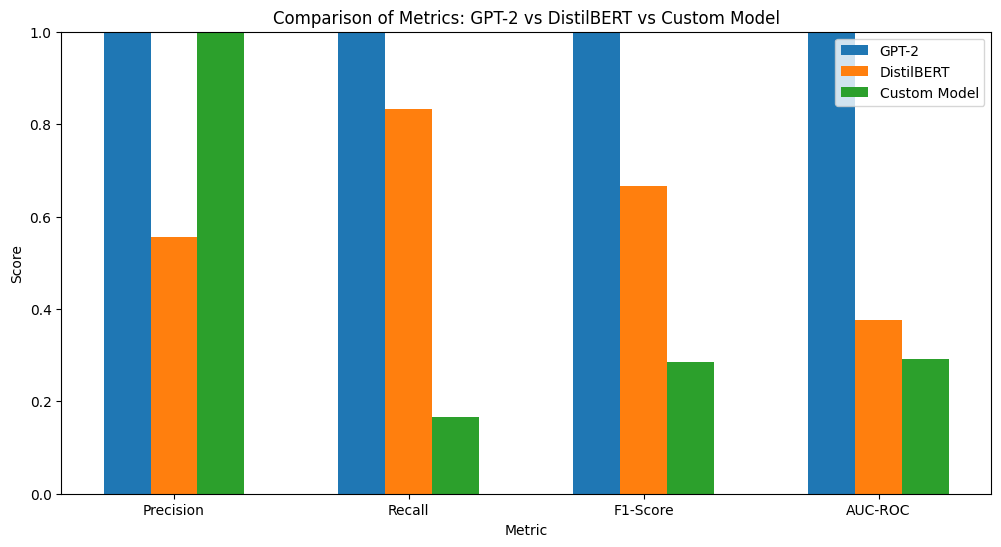

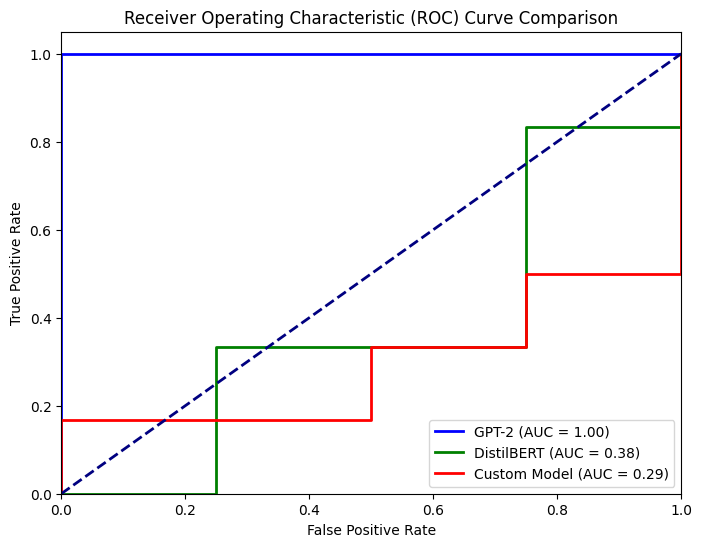

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  # Explicit import of auc
import numpy as np

# Add custom model metrics to metrics list
metrics = [
    [gpt2_precision, gpt2_recall, gpt2_f1, gpt2_auc],
    [distilbert_precision, distilbert_recall, distilbert_f1, distilbert_auc],
    [custom_precision, custom_recall, custom_f1, custom_auc]
]
model_names = ['GPT-2', 'DistilBERT', 'Custom Model']
metrics_names = ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']

# Bar chart
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Bar width
x = np.arange(len(metrics_names))  # Label positions

for i, model_metrics in enumerate(metrics):
    ax.bar(x + width * i, model_metrics, width, label=model_names[i])

ax.set_xticks(x + width)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0, 1)
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics: GPT-2 vs DistilBERT vs Custom Model')
ax.legend()

plt.show()

# ROC Curve for all models
fpr_gpt2, tpr_gpt2, _ = roc_curve(labels_array, gpt2_y_pred_proba)
fpr_distilbert, tpr_distilbert, _ = roc_curve(labels_array, distilbert_y_pred_proba)
fpr_custom, tpr_custom, _ = roc_curve(labels_array, y_pred_custom_proba)

roc_auc_gpt2 = auc(fpr_gpt2, tpr_gpt2)
roc_auc_distilbert = auc(fpr_distilbert, tpr_distilbert)
roc_auc_custom = auc(fpr_custom, tpr_custom)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gpt2, tpr_gpt2, color='blue', lw=2, label=f'GPT-2 (AUC = {roc_auc_gpt2:.2f})')
plt.plot(fpr_distilbert, tpr_distilbert, color='green', lw=2, label=f'DistilBERT (AUC = {roc_auc_distilbert:.2f})')
plt.plot(fpr_custom, tpr_custom, color='red', lw=2, label=f'Custom Model (AUC = {roc_auc_custom:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.show()


In [ ]:
embedding_dim = 16
max_length = 100  # Ensure that max_length is defined or based on your data

# LSTM-based model setup
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(100000, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(64, return_sequences=False),  # Adding LSTM layer
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
labels_array = np.array(labels)

num_epochs = 10

# Training the model
history = model.fit(padded_sentences, labels_array, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 119s 84ms/step - accuracy: 0.5460 - loss: 0.6890 - val_accuracy: 0.5258 - val_loss: 0.6920
Epoch 2/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 110s 61ms/step - accuracy: 0.5467 - loss: 0.6889 - val_accuracy: 0.5258 - val_loss: 0.6921
Epoch 3/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 85s 61ms/step - accuracy: 0.5460 - loss: 0.6891 - val_accuracy: 0.5258 - val_loss: 0.6927
Epoch 4/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 144s 63ms/step - accuracy: 0.5494 - loss: 0.6883 - val_accuracy: 0.5258 - val_loss: 0.6927
Epoch 5/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 142s 63ms/step - accuracy: 0.5452 - loss: 0.6892 - val_accuracy: 0.5258 - val_loss: 0.6929
Epoch 6/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 85s 61ms/step - accuracy: 0.5475 - loss: 0.6887 - val_accuracy: 0.5258 - val_loss: 0.6921
Epoch 7/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 87s 63ms/step - accuracy: 0.5476 - loss: 0.6888 - val_accuracy: 0.5258 - val_loss: 0.6930
Epoch 8/10
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 85s 61ms/step - accuracy: 0.54

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# First, we need to preprocess the test sentences the same way as training data
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(test_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)
padded_test = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Get model predictions
y_pred_proba = model.predict(padded_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()
y_true = np.array(labels)

# Calculate metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred_proba)

# Print results
print("Classification Metrics for Custom LSTM Sarcasm Detection:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"AUC-ROC: {auc:.3f}")

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Literal', 'Sarcastic']))

# Print predictions vs actual labels for inspection
print("\nDetailed Predictions:")
print("Sentence | Actual | Predicted | Sarcasm Probability")
print("-" * 80)
for sent, true_label, pred_label, prob in zip(test_sentences, y_true, y_pred, y_pred_proba.flatten()):
    print(f"{sent[:50]}... | {true_label} | {pred_label} | {prob:.3f}")

# Plot training history if available
if history is not None:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Optional: Add confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


ValueError: Found input variables with inconsistent numbers of samples: [55328, 10]

Performance comparison

# Text Generation

# Text Generation using our own model built from scratch

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd

In [ ]:
data = "You can usually identify bullying through the following three characteristics: intent, repetition, and power.\n A person who bullies intends to cause pain, either through physical harm or hurtful words or behaviour, and does so repeatedly.\n Boys are more likely to experience physical bullying, while girls are more likely to experience psychological bullying.\n\nBullying is a pattern of behaviour, rather than an isolated incident.\n Children who bully usually come from a perceived higher social status or position of power, such as children who are bigger, stronger,\n"

In [ ]:
tokenizer = Tokenizer()
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1 # +1 is for the OOV

print(tokenizer.word_index)
print(total_words)

{'bullying': 1, 'a': 2, 'who': 3, 'to': 4, 'or': 5, 'are': 6, 'usually': 7, 'through': 8, 'and': 9, 'power': 10, 'physical': 11, 'behaviour': 12, 'more': 13, 'likely': 14, 'experience': 15, 'of': 16, 'children': 17, 'you': 18, 'can': 19, 'identify': 20, 'the': 21, 'following': 22, 'three': 23, 'characteristics': 24, 'intent': 25, 'repetition': 26, 'person': 27, 'bullies': 28, 'intends': 29, 'cause': 30, 'pain': 31, 'either': 32, 'harm': 33, 'hurtful': 34, 'words': 35, 'does': 36, 'so': 37, 'repeatedly': 38, 'boys': 39, 'while': 40, 'girls': 41, 'psychological': 42, 'is': 43, 'pattern': 44, 'rather': 45, 'than': 46, 'an': 47, 'isolated': 48, 'incident': 49, 'bully': 50, 'come': 51, 'from': 52, 'perceived': 53, 'higher': 54, 'social': 55, 'status': 56, 'position': 57, 'such': 58, 'as': 59, 'bigger': 60, 'stronger': 61}
62


In [ ]:
len(tokenizer.word_index)

61

In [ ]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print(input_sequences)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

[[18, 19], [18, 19, 7], [18, 19, 7, 20], [18, 19, 7, 20, 1], [18, 19, 7, 20, 1, 8], [18, 19, 7, 20, 1, 8, 21], [18, 19, 7, 20, 1, 8, 21, 22], [18, 19, 7, 20, 1, 8, 21, 22, 23], [18, 19, 7, 20, 1, 8, 21, 22, 23, 24], [18, 19, 7, 20, 1, 8, 21, 22, 23, 24, 25], [18, 19, 7, 20, 1, 8, 21, 22, 23, 24, 25, 26], [18, 19, 7, 20, 1, 8, 21, 22, 23, 24, 25, 26, 9], [18, 19, 7, 20, 1, 8, 21, 22, 23, 24, 25, 26, 9, 10], [2, 27], [2, 27, 3], [2, 27, 3, 28], [2, 27, 3, 28, 29], [2, 27, 3, 28, 29, 4], [2, 27, 3, 28, 29, 4, 30], [2, 27, 3, 28, 29, 4, 30, 31], [2, 27, 3, 28, 29, 4, 30, 31, 32], [2, 27, 3, 28, 29, 4, 30, 31, 32, 8], [2, 27, 3, 28, 29, 4, 30, 31, 32, 8, 11], [2, 27, 3, 28, 29, 4, 30, 31, 32, 8, 11, 33], [2, 27, 3, 28, 29, 4, 30, 31, 32, 8, 11, 33, 5], [2, 27, 3, 28, 29, 4, 30, 31, 32, 8, 11, 33, 5, 34], [2, 27, 3, 28, 29, 4, 30, 31, 32, 8, 11, 33, 5, 34, 35], [2, 27, 3, 28, 29, 4, 30, 31, 32, 8, 11, 33, 5, 34, 35, 5], [2, 27, 3, 28, 29, 4, 30, 31, 32, 8, 11, 33, 5, 34, 35, 5, 12], [2, 27, 

In [ ]:
print(xs[6])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 18 19  7 20  1  8 21]


In [ ]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.0641 - loss: 4.1252
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0344 - loss: 4.1186
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0523 - loss: 4.1105
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0484 - loss: 4.1051 
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0648 - loss: 4.0989 
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0805 - loss: 4.0861 
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0609 - loss: 4.0837 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0906 - loss: 4.0677 
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0828 - loss: 4.0544 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0828 - loss: 4.0255 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0766 - loss: 4.0180 
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0828 - lo

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 21, 64)              │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 40)                  │          13,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 62)                  │           2,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,332 (235.68 KB)

 Trainable params: 20,110 (78.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,222 (157.12 KB)

In [ ]:
model.save("./mymodel.h5")

In [ ]:
# prompt: i trained a model text generation and want to test it based on the code n previous cells

seed_text = "Bullying is"
next_words = 10

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = np.argmax(model.predict(token_list), axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
seed_text

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'Bullying is a pattern of behaviour rather than an isolated incident incident'

In [ ]:
test_text = "Bullying is"
next_words = 10

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([test_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict(token_list, verbose=0)
  predicted_class = np.argmax(predicted)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted_class:
      output_word = word
      #break
      test_text += " " + output_word
  print(test_text)

Bullying is a
Bullying is a pattern
Bullying is a pattern of
Bullying is a pattern of behaviour
Bullying is a pattern of behaviour rather
Bullying is a pattern of behaviour rather than
Bullying is a pattern of behaviour rather than an
Bullying is a pattern of behaviour rather than an isolated
Bullying is a pattern of behaviour rather than an isolated incident
Bullying is a pattern of behaviour rather than an isolated incident incident


# Text Generation Using **OPT-1.3b** by facebook

In [ ]:
# Instantiate tokenizer and dataset
data = "You can usually identify bullying through the following three characteristics: intent, repetition, and power.\n A person who bullies intends to cause pain, either through physical harm or hurtful words or behaviour, and does so repeatedly.\n Boys are more likely to experience physical bullying, while girls are more likely to experience psychological bullying.\n\nBullying is a pattern of behaviour, rather than an isolated incident.\n Children who bully usually come from a perceived higher social status or position of power, such as children who are bigger, stronger,\n"

In [ ]:
from transformers import AutoTokenizer
from torch.utils.data import Dataset, DataLoader


# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/opt-1.3b")

# Tokenizing the data
inputs = tokenizer(data, return_tensors="pt", truncation=True, padding=True, max_length=512)

# Define custom dataset class
class TextDataset(Dataset):
    def __init__(self, inputs):
        self.input_ids = inputs['input_ids']
        self.attention_mask = inputs['attention_mask']

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx]
        }

# Create DataLoader
dataset = TextDataset(inputs)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
from transformers import AutoModelForCausalLM, AdamW
import torch
from torch.utils.data import DataLoader

# Check if GPU is available and use it
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load pre-trained model and move it to the device (GPU if available)
model = AutoModelForCausalLM.from_pretrained("facebook/opt-350m").to(device)

# Prepare optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Gradient accumulation
accumulation_steps = 4  # Adjust based on available memory

# Fine-tuning loop
model.train()

epochs = 3
for epoch in range(epochs):
    epoch_loss = 0
    for step, batch in enumerate(dataloader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=input_ids)

        # Compute loss
        loss = outputs.loss
        loss = loss / accumulation_steps  # Scale the loss to account for gradient accumulation

        loss.backward()  # Backpropagate

        # Accumulate gradients
        if (step + 1) % accumulation_steps == 0:
            optimizer.step()  # Update weights
            optimizer.zero_grad()  # Reset gradients

        epoch_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(dataloader)}")

# Save the fine-tuned model
model.save_pretrained("fine_tuned_bullying_model")

config.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/663M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Loss: 0.7191917896270752
Epoch 2/3, Loss: 0.7272154092788696
Epoch 3/3, Loss: 0.7075027227401733


In [ ]:
#model.save_pretrained("fine_tuned_bullying_model")
tokenizer.save_pretrained("fine_tuned_bullying_model")

('fine_tuned_bullying_model/tokenizer_config.json',
 'fine_tuned_bullying_model/special_tokens_map.json',
 'fine_tuned_bullying_model/vocab.json',
 'fine_tuned_bullying_model/merges.txt',
 'fine_tuned_bullying_model/added_tokens.json',
 'fine_tuned_bullying_model/tokenizer.json')

In [ ]:
from transformers import pipeline

# Load the fine-tuned model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("fine_tuned_bullying_model")
model = AutoModelForCausalLM.from_pretrained("fine_tuned_bullying_model")

# Instantiate pipeline
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer)

# Prompt to generate text
prompt = "Bullying is"
generated_text = pipe(prompt, max_length=50, num_return_sequences=1)

print(generated_text[0]['generated_text'])


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Bullying is a problem in the US.                                        


# Text Generation Using **GPT-2**



In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments
import torch

In [ ]:
model = GPT2LMHeadModel.from_pretrained("gpt2")

In [ ]:
# Define your text corpus
data = "You can usually identify bullying through the following three characteristics: intent, repetition, and power.\n A person who bullies intends to cause pain, either through physical harm or hurtful words or behaviour, and does so repeatedly.\n Boys are more likely to experience physical bullying, while girls are more likely to experience psychological bullying.\n\nBullying is a pattern of behaviour, rather than an isolated incident.\n Children who bully usually come from a perceived higher social status or position of power, such as children who are bigger, stronger,\n"

# Preprocess and tokenize the text
corpus = data.lower().replace("\n", " ")

# Load the tokenizer and set the padding token
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set EOS token as padding token

# Encode the text data
tokens = tokenizer(corpus, return_tensors="pt", max_length=1024,padding=True, truncation=True)

# Save corpus to a file (required for TextDataset)
with open("corpus.txt", "w") as f:
    f.write(corpus)

# Load the dataset
dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="/content/corpus.txt",
    block_size=64,
)

In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./gpt2-finetuned",
    overwrite_output_dir=True,
    num_train_epochs=1,
    per_device_train_batch_size=2,
    save_steps=500,
    save_total_limit=2,
    prediction_loss_only=True,
    report_to="none"  # This disables wandb
)
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False
)
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
)

# Train the model
trainer.train()

# Save the model
trainer.save_model("./gpt2-finetuned")

Step,Training Loss


In [ ]:
# Generate text using the fine-tuned model
input_text = "What is bullying"
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Generate output
output = model.generate(input_ids, max_length=30, num_return_sequences=1, no_repeat_ngram_size=2)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

# Print the generated text
print("Generated text:", generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated text: What is bullying?

Bullying is a serious problem in the United States. It is not just a problem for the victims of bullying. The
